### Consigna 1

# Demostración

Queremos demostrar que, si $(I - A)^{-1} = I + A + A^2 + \dots + A^n$, entonces:
$$
\lim_{n \to \infty} A^{n+1} = 0.
$$


La expresión:
$$
(I - A)^{-1} = I + A + A^2 + \dots + A^n
$$
nos recuerda a la **serie geométrica**, pero aplicada a matrices. Esta serie geométrica de matrices converge (es decir, tiene un límite definido) si cada término $A^k$ se hace cada vez más pequeño a medida que $k$ aumenta.
Para que esta serie sea válida y converja cuando $n$ tiende a infinito, necesitamos que las potencias de $A$ (es decir, $A, A^2, A^3, \ldots$) se vuelvan cada vez más pequeñas y tiendan a cero.

## Condición para la Convergencia de la Serie

Para que una serie geométrica de matrices como esta converja, se necesita que los valores propios de $A$ (que podemos pensar como "medidas" de tamaño en cada dirección de $A$) tengan valores absolutos menores que 1.
Cuando esta condición se cumple ( valores propios de $A$ cumplan que $|\lambda| < 1$), cada potencia de $A$ se hace más pequeña conforme aumentamos el exponente.

## Comportamiento de las Potencias de $A$

Si los valores propios de $A$ están todos en valor absoluto menor que 1, entonces cada potencia de $A$ se hace cada vez más pequeña:
$$
A, A^2, A^3, \dots, A^n \rightarrow 0 \quad \text{cuando } n \to \infty.
$$

Esto implica que
$$
\lim_{n \to \infty} A^{n+1} = 0.
$$



### Consigna 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [38]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

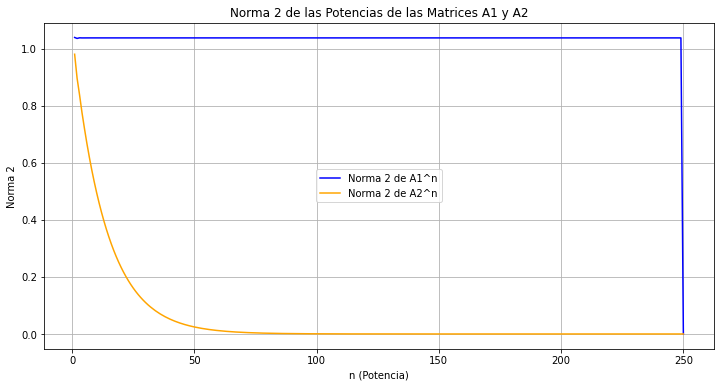

In [39]:
N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)

for i in range(0,N-1):
  a1[i] = norm(np.linalg.matrix_power(A1, i + 1), ord=2)
  a2[i] = norm(np.linalg.matrix_power(A2, i + 1), ord=2)

plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), a1, label='Norma 2 de A1^n', color='blue')
plt.plot(range(1, N + 1), a2, label='Norma 2 de A2^n', color='orange')
plt.title('Norma 2 de las Potencias de las Matrices A1 y A2')
plt.xlabel('n (Potencia)')
plt.ylabel('Norma 2')
plt.legend()
plt.grid()
plt.show()

### Consigna 3

In [40]:
def metodoPotencia(A,num_iteraciones):
  tolerancia = 1e-6
  autovalores = []
  n = A.shape[0]

  for _ in range(num_iteraciones):
    x0 = np.random.rand(n)
    x0 = x0 / np.linalg.norm(x0)

    while True:
      x1 = A@x0
      x1 = x1/np.linalg.norm(x1)
      if (np.linalg.norm(x1 - x0)) < tolerancia :
        break
      x0 = x1

    autovalor = (x0.T @ A @ x0)
    autovalores.append(autovalor)

  promedio = np.mean(autovalores)
  desviacion_estandar = np.std(autovalores)
  maxaval = max(autovalores)

  return promedio, desviacion_estandar , maxaval, autovalores


In [41]:
p1,d1,a1,v1 = metodoPotencia(A1,250)
print ("El autovalor mas grande de A1 es: " + str(a1))

p2,d2,a2,v2 = metodoPotencia(A2,250)
print ("El autovalor mas grande de A2 es: " + str(a2))

El autovalor mas grande de A1 es: 1.0000000752133356
El autovalor mas grande de A2 es: 0.9276516147718796


In [42]:
import pandas as pd

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalores': [p1, p2],
    'Desviación Estándar': [d1, d2]
}

tabla = pd.DataFrame(data)

print(tabla)

  Matriz  Promedio Autovalores  Desviación Estándar
0     A1              1.000000         3.507901e-08
1     A2              0.927651         1.072308e-07


### Consigna 4

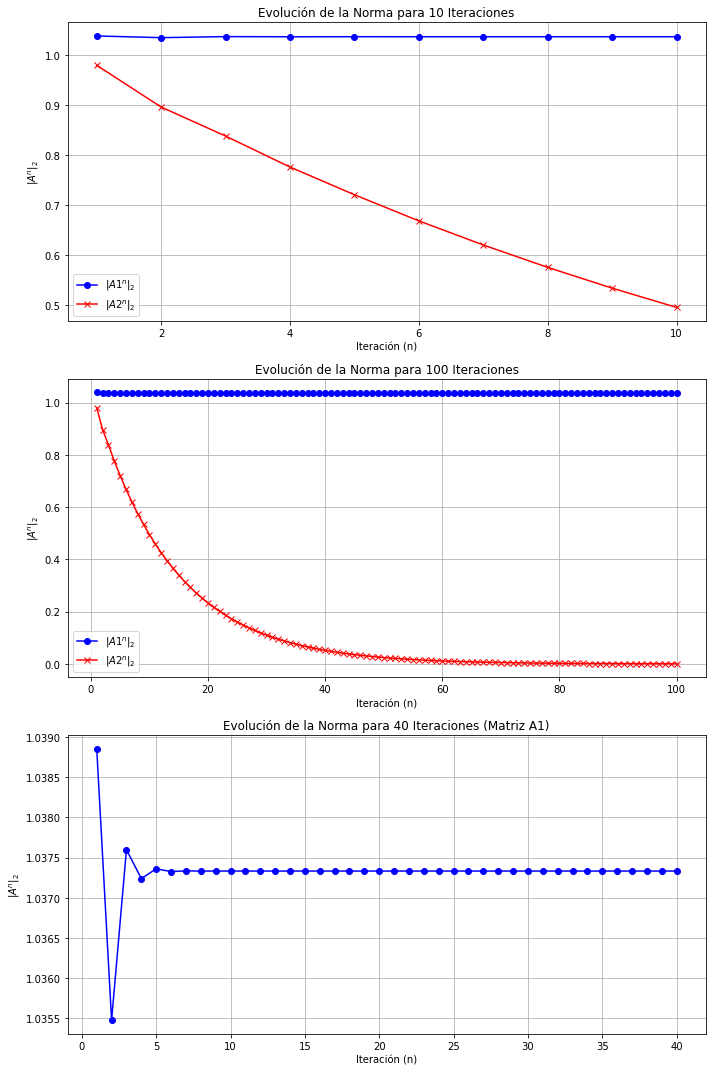

In [43]:

def sucesion_de_potencias(A,k):
  normas = []
  A_potencia = np.eye(A.shape[0])

  for i in range(1,k + 1 ):
    A_potencia = A_potencia@A
    norma = norm(A_potencia, 2)
    normas.append(norma)

  return normas

normasA1_10 = sucesion_de_potencias(A1,10)
normasA2_10 = sucesion_de_potencias(A2,10)

normasA1_100 = sucesion_de_potencias(A1,100)
normasA2_100 = sucesion_de_potencias(A2,100)


normasA1_40 = sucesion_de_potencias(A1,40)

# GRAFICOS

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de la serie de normas para 10 iteraciones
ax1.plot(range(1, len(normasA1_10) + 1), normasA1_10, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax1.plot(range(1, len(normasA2_10) + 1), normasA2_10, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax1.set_xlabel('Iteración (n)')
ax1.set_ylabel(r'$\|A^n\|_2$')
ax1.set_title('Evolución de la Norma para 10 Iteraciones')
ax1.legend()
ax1.grid(True)

# Gráfico de la serie de normas para 100 iteraciones
ax2.plot(range(1, len(normasA1_100) + 1), normasA1_100, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax2.plot(range(1, len(normasA2_100) + 1), normasA2_100, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax2.set_xlabel('Iteración (n)')
ax2.set_ylabel(r'$\|A^n\|_2$')
ax2.set_title('Evolución de la Norma para 100 Iteraciones')
ax2.legend()
ax2.grid(True)

# Gráfico de la serie de normas de A1 para 40 iteraciones
ax3.plot(range(1, len(normasA1_40) + 1), normasA1_40, marker='o', color='b')
ax3.set_xlabel('Iteración (n)')
ax3.set_ylabel(r'$\|A^n\|_2$')
ax3.set_title('Evolución de la Norma para 40 Iteraciones (Matriz A1)')
ax3.grid(True)

# Ajuste de la distribución de subgráficos
plt.tight_layout()
plt.show()




Notemos que hay convergencia solo para la matriz A2, esto pues la serie de potencias de su norma converge. Su convergencia es hacia 0, y A1 no converge, sino que comienza a oscilar de forma constante al rededor del valor 1.0374.
Una regla general para que la serie infinita de normas de las potencias de una matriz converga es que el mayor autovalor en valor absoluto de la matriz sea menor que 1 , es decir que su radio espectral lo sea.
para nuestro ejemplo, recordemos que el autovalor de A1 era igual a 1.0000000895350079 y el de A2 era menor, exactamente 0.9276516098096924.

Veamos ahora los errores

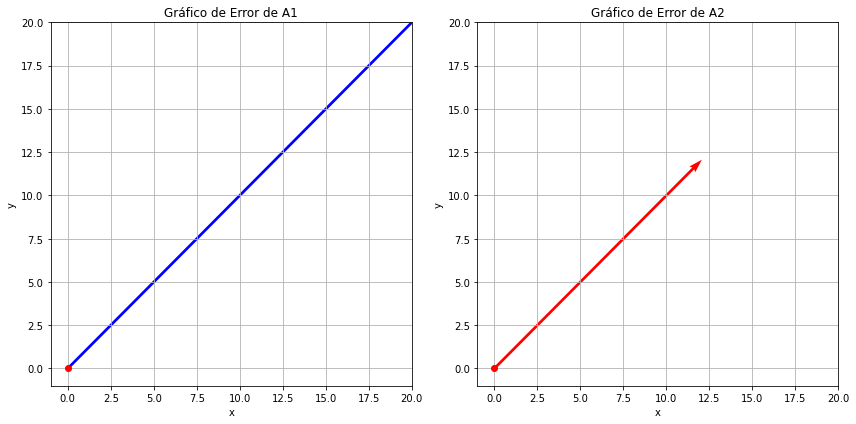

In [44]:

from scipy.linalg import solve_triangular
from funciones import calcularLU, inversaLU

def error(A, n):
    sum = np.eye(A.shape[0])
    for i in range(1, n):
        sum += A**i

    I = np.eye(A.shape[0])
    L, U, P = calcularLU(I - A)
    inv = inversaLU(L, U, P)

    norma = np.linalg.norm(sum - inv) # la norma de esta diferencia mide qué tan cerca está la serie geométrica de converger a la matriz inversa.
    return norma

v1 = error(A1, 10)
v2 = error(A2, 10)

# Crear subgráficos (dos gráficos)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Tamaño de figura más grande con 2 subgráficos

# Graficar el valor de la norma para A1 en el primer subgráfico
ax1.quiver(0, 0, v1, v1, angles='xy', scale_units='xy', scale=1, color='blue', label='A1')

# Limitar los ejes para visualizar mejor
ax1.set_xlim(-1, 20)
ax1.set_ylim(-1, 20)

# Dibujar el origen
ax1.plot(0, 0, 'ro')  # Punto rojo en el origen

# Configurar las líneas de la cuadrícula
ax1.grid(True)

# Añadir etiquetas y título
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Gráfico de Error de A1')

# Graficar el valor de la norma para A2 en el segundo subgráfico
ax2.quiver(0, 0, v2, v2, angles='xy', scale_units='xy', scale=1, color='red', label='A2')

# Limitar los ejes para visualizar mejor
ax2.set_xlim(-1, 20)
ax2.set_ylim(-1, 20)

# Dibujar el origen
ax2.plot(0, 0, 'ro')  # Punto rojo en el origen

# Configurar las líneas de la cuadrícula
ax2.grid(True)

# Añadir etiquetas y título
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Gráfico de Error de A2')

# Mostrar los gráficos
plt.tight_layout()  # Ajustar el espaciado
plt.show()

La pendiente 1 en el gráfico e refleja que el error entre la suma de las potencias y la inversa de
I−A está siguiendo una tendencia lineal. Esto puede ser un indicativo de que
A tiene valores propios cercanos a 1, lo que afecta la velocidad de convergencia de la serie geométrica.

Como la norma del vector de error es mayor para A2
  que para A1
 , es probable que las propiedades espectrales de A2
  (como valores propios cercanos a 1 o más grandes en valor absoluto) estén causando que la serie geométrica de matrices converja más lentamente y, por lo tanto, resultando en un error mayor. En contraste, si A1
  tiene valores propios más pequeños (en valor absoluto), la serie convergerá más rápido, y el error será menor.

### Consigna 5

In [45]:
Appdata = pd.read_csv("Appdata.csv")
Anndata = pd.read_csv("Anndata.csv")
App = Appdata.values
Ann = Anndata.values

In [46]:
import numpy as np
from funciones import metodoPotencia, calcularLU, inversaLU

pAnn,dAnn,avalmaxAnn, avalsAnn = metodoPotencia(Ann,50)
pApp,dApp,avalmaxApp, avalsApp = metodoPotencia(App,50)

print ("El autovalor mas grande de Ann es: " + str(avalmaxAnn))
print(avalsAnn)
print ("El autovalor mas grande de App es: " + str(avalmaxApp))
print(avalsApp)

El autovalor mas grande de Ann es: 0.263284951759814
[0.23231530856487637, 0.25932411461471017, 0.2579800022643916, 0.26238459000537234, 0.263284951759814, 0.26291377477167716, 0.26238033630903557, 0.2619109645718242, 0.2615532590164985, 0.26129502131962995, 0.26111260033083206, 0.26098492573065935, 0.26089602916524174, 0.2608343388466995, 0.2607916210411876, 0.2607620814829997, 0.26074167240920115, 0.26072757930857643, 0.2607178508877208, 0.26071113679657687, 0.2607065036362347, 0.26070330668798813, 0.260701100835414, 0.2606995788557235, 0.26069852873782806, 0.26069780418984123, 0.26069730427298465, 0.2606969593431928, 0.2606967213491004, 0.26069655713738216, 0.2606964438335994, 0.2606963656552133, 0.2606963117127553, 0.2606962744927674]
El autovalor mas grande de App es: 0.3915328830183234
[0.29832407970979574, 0.3884300892132289, 0.3915328830183234, 0.39004908192257715, 0.3883548520973461, 0.38672547766503884, 0.3856603143683168, 0.3850994940395502, 0.3848484244130022, 0.38475129160

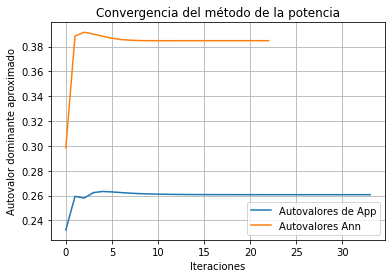

In [47]:
plt.plot(avalsAnn, label='Autovalores de App')
plt.plot(avalsApp, label='Autovalores Ann')
plt.xlabel('Iteraciones')
plt.ylabel('Autovalor dominante aproximado')
plt.title('Convergencia del método de la potencia')
plt.legend()
plt.grid(True)
plt.show()

### Consigna 6

a) Vamos a probar que para cualquier vector $z \in \mathbb{R}^n$ sucede que el promedio de las componentes es 0.  (REVISAR ESTO)

Sabiendo que $E_n \in \mathbb{R}^{n \times n}$ se escribe como $ E_n = I_n - \frac{1}{n}ee^t $  podemos decir que:
$$ E_nz = I_n - \frac{1}{n}ee^tz = z - \frac{1}{n}ee^tz \quad ,luego\,\, usando\, \, e = \begin{pmatrix} 1 \\\vdots \\ 1 \end{pmatrix}  \,\, puedo \,\,escribir\,\, que\,\, e^tz= \sum_{i=1}^{n} z_i$$
$$ reemplazando\,\, obtenemos\,\, E_n = z -\frac{1}{n}\left( \sum_{i=1}^{n} z_i \right) e$$
$$ Sabiendo \,\,que \,\,el\,\, promedio\,\, de\,\, las\,\, componentes\,\, se \,\,escribe\,\, como\,\, \frac{1}{n} \sum_{i=1 }^{n}z_i \,\, luego: $$

$$ \frac{1}{n} \sum_{i=1}^{n} z_i = \frac{1}{n} \sum_{i=1}^{n} \left( z_i - \frac{1}{n} \sum_{j=1}^{n} z_j \right) = \frac{1}{n} \sum_{i=1}^{n} z_i - \frac{1}{n} \sum_{j=1}^{n} z_j = 0$$
b) Para este ejercicio primero buscamos expresar la matriz de la transformacion lineal $E_n$ en la base $ \{e,d_2,..., d_n\}$ luego podremos calcular los autovalores, autovectores y determinar la imagen y nucleo de dicha matriz.
$$ \bullet caso \,\, E_ne $$
$$\quad E_ne =\left(I_n - \frac{1}{n}ee^t \right)e = e - \frac{1}{n}e\left(e^te\right) = e - \frac{1}{n}en = 0$$
$$E_n = 0 \,\,podemos \,\,interpretarlo\,\, como \,\, Av = \lambda  \,\, con \,\,v = e\,\, y \,\, \lambda = 0 $$
$$\bullet caso \,\, E_nd $$
$$ Sabemos\,\, que\,\, d \in \{d_2,...,d_n \}\,\, y \,\,como\,\, estos\,\, vectores\,\, son\,\, ortogonales \,\,a\,\, e\,\, luego\,\, e^td_i =0$$
$$ E_nd= \left(I_n - \frac{1}{n}ee^t \right)d = d - \frac{1}{n}e\left(e^td\right)= d$$
$$ Entonces \,\,E_nd = 1d \quad \Rightarrow \quad d \,\,es \,\,autovector\,\, de\,\, \lambda = 1$$
Ahora para encontrar el nucleo y la imagen de esta matriz es cuestion de poner los transformados de los elementos de la base $b=\{ d_2,...d_n\}$ como columnas

$$ E_n = Abb =
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} $$
Con esta matriz obtenemos los subespacios buscados:
$$ \bullet  Nucleo: el \,\,unico \,\,vector\,\, que\,\, manda \,\,otros\,\, al \,\, 0 \,\, es \,\,e\,\,$$
$$ Vemos \,\ que \,\ Nu\left( E_n \right) = \langle e \rangle \,\ luego \,\ dim \left( Nu\left(E_n\right) \right) = 1$$
$$ \bullet Im \left( E_n\right) = \langle d_2, ... ,d_n \rangle \,\, entonces\,\,  dim \left( Im\left(E_n\right) \right) = n - 1  $$

c) Sabemos que un proyector se dice ortogonal si y solo si $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Anteriormente  pudimos observar que es cierto que $ \langle d_2, ... , d_n\rangle $ es ortogonal a  $\langle e\rangle$, sabemos que $Im\left( A \right) = \langle d_2, ... , d_n\rangle$ y $Nu\left(A \right) = \langle e \rangle   $ luego $Nu\left(A \right) \bot Im\left( A \right)  \\ $

Dicho proyector proyecta sobre el subespacio generado por $ \langle d_2, ... , d_n\rangle $

d)

$ \bullet $ (REVISAR) Es FALSO que  E_n es una matriz  ortogonal: quiero   ver  que  $E_n^tE_n = I \,\,luego $
$$ \left( I_n - \frac{1}{n}ee^t \right)^t \left( I_n -\frac{1}{n}ee^t \right) = \left( I_n- \frac{1}{n}e^te \right) \left( I_n- \frac{1}{n}ee^t\right) = I_n -\frac{2}{n}e^te + \frac{1}{n^2}nee^t = I_n - \frac{1}{n}ee^t \neq I$$

$ \bullet $  Es VERDADERO que $E_n$ es una matriz singular pues tiene columnas de ceros y tambien sabemos que $det\left( E_n\right) = det \left( 0d_2...d_n \right) = 0 $

$ \bullet $ Es FALSO que $E_n$ es definida positiva pues vimos que dicha matriz NO es inversible. (REVISAR)

$ \bullet $ Es VERDADERO que $tr\left(E_n\right) = n - 1:$

$$sabemos\,\,  que \,\,  E_n =  
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix} \quad \Rightarrow tr\left(E_n\right) = n-1 $$
</p>



### Consigna 7

In [48]:
def metodoPotenciaRecursivo(C, k, epsilon=1e-6, autovalores=None, autovectores=None):
    if autovalores is None:
        autovalores = []
    if autovectores is None:
        autovectores = []
    # Caso base
    if len(autovalores) == k:
        return autovalores, autovectores

    # Generamos un vector aleatorio normalizado
    n = C.shape[0]
    x = np.random.rand(n)
    x = x / np.linalg.norm(x)

    # Iteramos
    x_next = C @ x
    x_next = x_next / np.linalg.norm(x_next)

    while np.linalg.norm(x_next - x) >= (1 - epsilon):
        x = x_next
        x_next = C @ x
        x_next = x_next / np.linalg.norm(x_next)

    # Calculamos el autovalor usando el cociente de Rayleigh y lo guardamos con el autovector aproximado
    autovalor = (x.T @ C @ x) / (x.T @ x)
    autovalores.append(autovalor)
    autovectores.append(x)  # Aquí se guarda el autovector correspondiente

    # Construimos la nueva matriz C' = C - autovalor * x * x^T
    Cprima = C - autovalor * np.outer(x, x)

    return metodoPotenciaRecursivo(Cprima, k, epsilon, autovalores, autovectores)



In [49]:
#Armamos nuestra matriz de covarianzas C del paıs Peru
In = np.eye(40)
e = np.ones((40, 1))
eeT = np.outer(e, e)
En = In - (1 / 40) * eeT
AppC = En@App
C = (np.transpose(AppC)@AppC)/(40 - 1)

In [50]:
autovalores, autovectores = metodoPotenciaRecursivo(C, k=2)
for i in range(len(autovalores)):
    print(f"Autovector {i+1}: {autovectores[i].flatten()}")
    print(f"Autovalor {i+1}: {autovalores[i]}")

Autovector 1: [0.24280471 0.20454996 0.02383713 0.23904777 0.19630493 0.10721193
 0.12796481 0.15473267 0.15037167 0.06514821 0.01186057 0.23667434
 0.14504175 0.21867149 0.12272348 0.07426652 0.00345561 0.0625146
 0.09473207 0.06659209 0.03318041 0.28924564 0.22999682 0.04049608
 0.20569974 0.00891795 0.13853961 0.15364575 0.00202833 0.26403505
 0.1160014  0.26426058 0.28485199 0.09122594 0.07448012 0.27147592
 0.06133886 0.06153352 0.03044617 0.08177225]
Autovalor 1: 0.005618408927365421
Autovector 2: [0.03595406 0.17187126 0.2215736  0.0755117  0.1471189  0.17514763
 0.08966146 0.05998461 0.18200277 0.20223419 0.14576493 0.20383803
 0.0724242  0.21600904 0.19135718 0.17611727 0.05196579 0.1233306
 0.15135398 0.10245233 0.0259713  0.25574889 0.01590937 0.23476754
 0.10225275 0.01138792 0.18773166 0.11486729 0.09687649 0.24980693
 0.16471626 0.12438586 0.2078311  0.05458451 0.15524269 0.24165683
 0.19695014 0.21880332 0.17449214 0.04568599]
Autovalor 2: 0.0031598320854615523


### Consigna 8

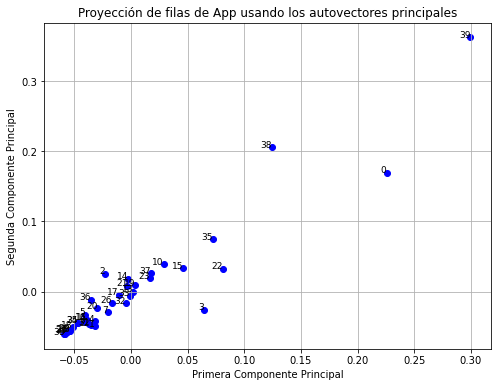

In [51]:
###Duda sobre como proyectar los autovectores sobre la matriz de cada pais
## PAIS 1: PERU
subespacio = np.array(autovectores).T
proyeccion = AppC @ np.array(autovectores).T

plt.figure(figsize=(8, 6))
plt.scatter(proyeccion[:, 0], proyeccion[:, 1], color='blue', marker='o')
plt.title("Proyección de filas de App usando los autovectores principales")
for i in range(proyeccion.shape[0]):
    plt.text(proyeccion[i, 0], proyeccion[i, 1], str(i), fontsize=9, ha='right')
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.grid()
plt.show()

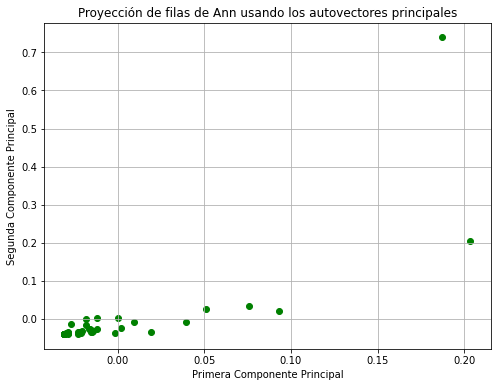

In [52]:
### Veamos si podemos sacar mas informacion sobre el Pais 2: Nicaragua
AnnC = En@Ann
C2 = (np.transpose(AnnC)@AnnC)/(40 - 1)
autovalores2, autovectores2 = metodoPotenciaRecursivo(C2, k=2)
subespacio = np.array(autovectores2).T
proyeccion = AnnC @ np.array(autovectores2).T

plt.figure(figsize=(8, 6))
plt.scatter(proyeccion[:, 0], proyeccion[:, 1], color='green', marker='o')
plt.title("Proyección de filas de Ann usando los autovectores principales")
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.grid()
plt.show()

import seaborn as sns

### Consigna 9 -

Para una matriz cuadrada A cuyo mayor autovalor asociado tiene valor absoluto menor que 1, se cumple que:
$$ (I −A)^{−1} = I + A + A^2 + A^3 + ... + A^n+ ... $$
Esta condicion siempre se cumple en las matrices $ A $ de insumo-producto. Para estas matrices, la sucesion suma de potencias representa:

- $ A^1 $ La matriz insumo-producto sin modificaciones: Los insumos usados directamente para producir otros

- $ A^2 $ El insumo necesario para producir los insumos que se usan en el item anterior, O sea, los insumos indirectos de orden 2

- $ A^n $ Insumos indirectos de orden $ n $, o sea, los necesarios luego de $ n $ etapas en la cadena de producción

Podemos usar la ecuacion para reemplazarla en la definicion de la matriz input-output integrada verticalmente $ H $
$$ H = A (I − A)^{−1} $$
$$ H = A (I + A + A^2 + A^3 + ... + A^n+ ...) $$
$$ H = A + A^2 + A^3 + ... + A^n+ ... $$

Por eso se enfoca en la acumulacion de los efectos indirectos y se refuerzan las relaciones entre los sectores que tienen una alta relevancia en A

### Consigna 10 -

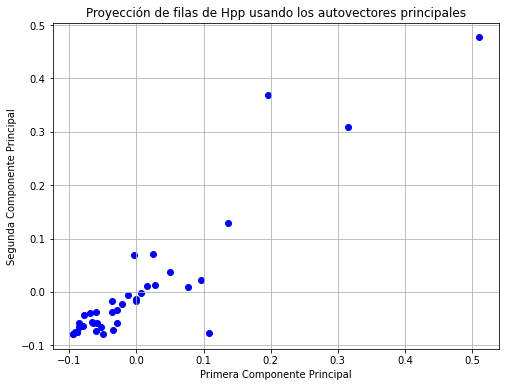

In [53]:
from funciones import calcularLU, inversaLU
# from funciones import metodoPotenciaRecursivo

import pandas as pd
import numpy as np
import seaborn as sns

# Calculo Leontief de Peru
Ipp = np.eye(App.shape[0])
Lpp, Upp, Ppp = calcularLU(Ipp - App)  # LU de Leontief Perú
LeontiefInvpp = inversaLU(Lpp, Upp, Ppp)

# Calculo input-output integrada verticalmente H
Hpp = App@LeontiefInvpp

# (Desde pto 8)

HppC = En@Hpp
C2 = (np.transpose(HppC)@HppC)/(40 - 1)
autovalores2, autovectores2 = metodoPotenciaRecursivo(C2, k=2)
subespacio = np.array(autovectores2).T
proyeccion = HppC @ np.array(autovectores2).T

plt.figure(figsize=(8, 6))
plt.scatter(proyeccion[:, 0], proyeccion[:, 1], color='blue', marker='o')
# sns.scatterplot(x=proyeccion[:, 0], y=proyeccion[:, 1], hue=clusters, s=100, edgecolor='k', color='blue', marker='o')
plt.title("Proyección de filas de Hpp usando los autovectores principales")
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.grid()



justificacion

### Consigna 11 -

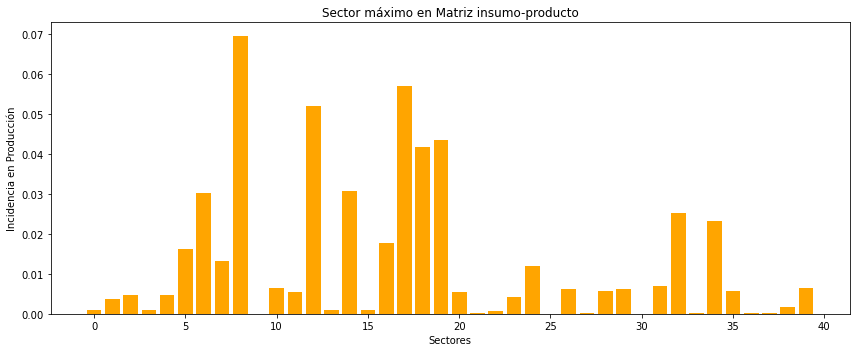

None


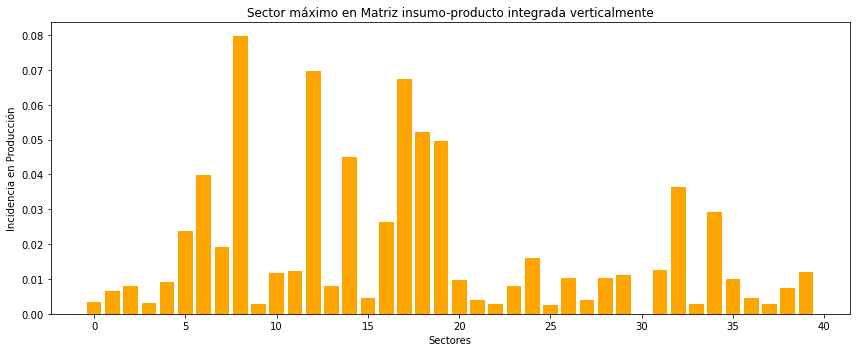

None


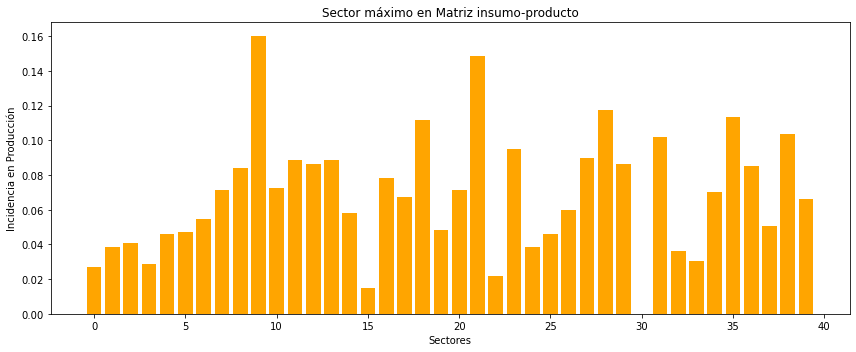

None


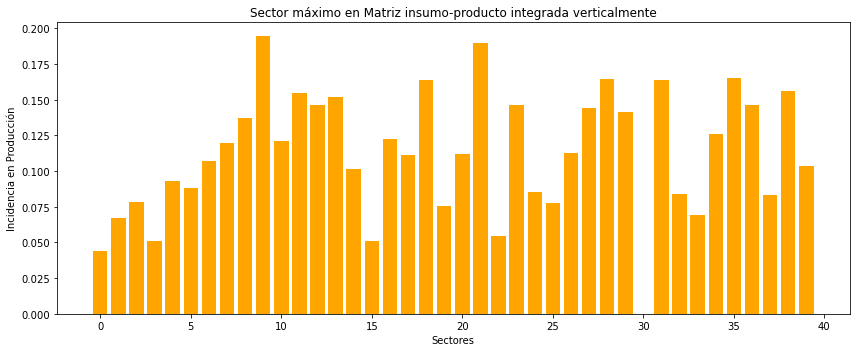

None


In [54]:
# Distancia al Origen de coordenadas con la Norma de la Proyeccion
normas_proyeccion = np.zeros(proyeccion.shape[0])
for i in range(proyeccion.shape[0]):
    normas_proyeccion[i] = np.linalg.norm(proyeccion[i])

# Calculo minima y maxima distancia
MinNormaProyeccion = np.inf
MaxNormaProyeccion = 0
for i in range(proyeccion.shape[0]):
    if normas_proyeccion[i] < MinNormaProyeccion:
        MinNormaProyeccion = normas_proyeccion[i]
        IndiceDelMin = i
    if normas_proyeccion[i] > MaxNormaProyeccion:
        MaxNormaProyeccion = normas_proyeccion[i]
        IndiceDelMax = i

def graficarFilas (Matriz, indice, titulo):
    # Crear figura y ejes
    fig, axs = plt.subplots(1, 1, figsize=(12, 5))
    # Graficar la diferencia en barras
    axs.bar(range(len(Matriz[indice])), Matriz[indice], color='orange')
    axs.set_title(titulo)
    axs.set_xlabel('Sectores')
    axs.set_ylabel('Incidencia en Producción')

    plt.tight_layout()
    plt.show()

TituloAppMin="Sector mínimo en Matriz insumo-producto"
TituloHppMin="Sector mínimo en Matriz insumo-producto integrada verticalmente"
TituloAppMin="Sector máximo en Matriz insumo-producto"
TituloHppMin="Sector máximo en Matriz insumo-producto integrada verticalmente"
print(graficarFilas(App,IndiceDelMin,TituloAppMin))
print(graficarFilas(Hpp,IndiceDelMin,TituloHppMin))
print(graficarFilas(App,IndiceDelMax,TituloAppMin))
print(graficarFilas(Hpp,IndiceDelMax,TituloHppMin))